# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

In [8]:
import zipfile
import math
from PIL import Image, ImageDraw
import pytesseract
import cv2 as cv
import numpy as np

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

In [9]:
def search(word, imgs):
    '''
    Function takes a dictionary with key value pair there name and the PIL images
    Searches for given word in the newspaper
    If word is found then displays all the images the associated PIL image
    '''
    for key in imgs:
        #Converting images into grayscale
        gray = cv.cvtColor(np.array(imgs[key]), cv.COLOR_BGR2GRAY)
        
        #Converting graydcale images into text from text searching using tesseract
        s = pytesseract.image_to_string(gray)
        if word in s:
            print('Result found in file {}'.format(key))
            
            #Detecting faces in the gray scale image
            faces = face_cascade.detectMultiScale(gray, 1.3,5)
            
            #Checking if there are any faces in the file
            if len(faces)==0:
                print('But there were no faces in that file!')
                continue        
            
            #If there are faces            
            croped_faces = []
            for x, y, w, h in faces:
                # Cropping the faces file
                croped_face = imgs[key].crop((x,y,x+w,y+h))
                
                #Converting to thumbnail
                croped_face.thumbnail((100,100),Image.ANTIALIAS)
                croped_faces.append(croped_face)
                
            #Creating a contact sheet
            h = math.ceil(len(croped_faces)/5)
            contact_sheet = Image.new('RGB',(500, 100*h))
            xc = 0
            yc = 0
            for img in croped_faces:
                contact_sheet.paste(img, (xc, yc))
                if xc + 100 == contact_sheet.width:
                    xc = 0
                    yc += 100
                else:
                    xc += 100
                    
            #Displaying the contact sheet
            display(contact_sheet)

In [10]:
#Loading  small_img.zip
zip = zipfile.ZipFile(r'readonly/small_img.zip', 'r')
imgs = {}
for file in zip.namelist():
    imgs[file] = Image.open(zip.open(file))
zip.close()

Result found in file a-0.png


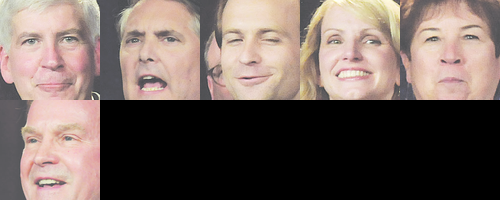

Result found in file a-3.png


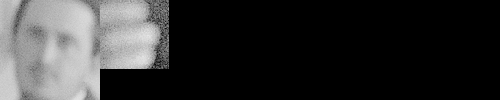

In [11]:
#Seaching Chris in loadeed images
word = 'Chris'
search(word, imgs)

In [12]:
#Loading images.zip
zip = zipfile.ZipFile(r'readonly/images.zip', 'r')
imgs = {}
for file in zip.namelist():
    imgs[file] = Image.open(zip.open(file))
zip.close()

Result found in file a-0.png


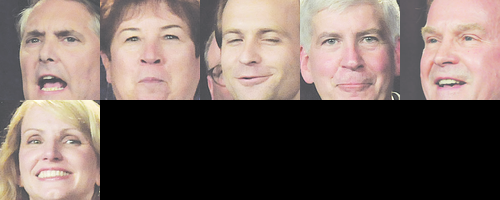

Result found in file a-1.png


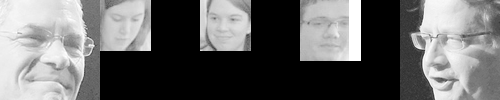

Result found in file a-10.png
But there were no faces in that file!
Result found in file a-13.png


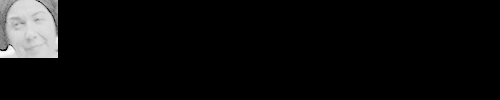

Result found in file a-2.png


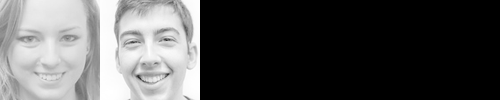

In [ ]:
#Seaching  in loadeed images
word = 'Mark'
search(word, imgs)